## Produit de convolution

In [1]:
import dispyrsal as ds

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
# kernel de moore size 1
M1 = ds.moore(1)
# kernel de moore size 2
M2 = ds.moore(2)
# kernel VonNeuman r=1
N1 = ds.neuman(1)
# kernel VonNeuman r=2
N2 = ds.neuman(2)

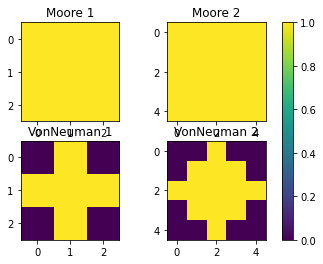

In [4]:
Kern=(M1,M2,N1,N2)
Kern_name = ('Moore 1', "Moore 2", "VonNeuman 1", "VonNeuman 2")
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(0,len(Kern)):
    axes.flat[i].set_title(Kern_name[i])
    im = axes.flat[i].imshow(Kern[i], vmin=0, vmax=1)
    
fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()

In [5]:
A = np.array([[0,0,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1, mode='same', boundary='fill')
Tup=(A,N1,B)
Tup_name = ("A", "N1", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=1)
    
fig.colorbar(im, ax=axes.ravel().tolist())

In [6]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1, mode='same', boundary='fill')

Tup=(A,N1,B)
Tup_name = ("A", "N1", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=3)
    
fig.colorbar(im, ax=axes.ravel().tolist())

In [7]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1, mode='same', boundary='wrap')

Tup=(A,N1,B)
Tup_name = ("A", "N1", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=3)
    
fig.colorbar(im, ax=axes.ravel().tolist())

### Scaled convolution : 'symm' vs 'fill'

In [8]:
distr = [1,0.5,0.1]
N1sc = ds.distrib_kernel(N1,distr)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
kernel = N1
r = (len(kernel)-1)/2
v = distr
N1[(r-1),:]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
distr = [1,1,1] #homogeneous
N1sc = ds.distrib_kernel(N1,distr)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

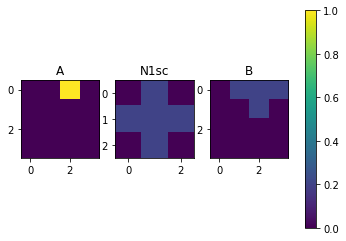

In [ ]:
A = np.array([[0,0,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1sc, mode='same', boundary='fill')
Tup=(A,N1sc,B)
Tup_name = ("A", "N1sc", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=1)
    
fig.colorbar(im, ax=axes.ravel().tolist())

### We compare argument 'fill' and 'symm' in boundary

Using Bounday as `symm` there is no leak, number are redistributed, while with `fill` number leak outside of the pad. The `wrap`option gives a circular output.

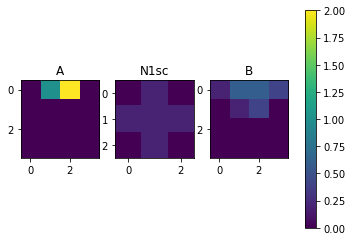

In [ ]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1sc, mode='same', boundary='fill')
Tup=(A,N1sc,B)
Tup_name = ("A", "N1sc", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=2)
    
fig.colorbar(im, ax=axes.ravel().tolist())

In [ ]:
print("sum A=", sum(sum(A)), "; sum B=", sum(sum(B)))

sum A= 3 ; sum B= 2.4


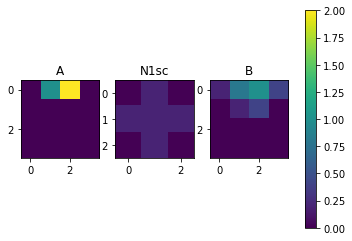

In [ ]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1sc, mode='same', boundary='symm')
Tup=(A,N1sc,B)
Tup_name = ("A", "N1sc", "B")
fig, axes = plt.subplots(nrows=1, ncols=3)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=2)
    
fig.colorbar(im, ax=axes.ravel().tolist())

In [ ]:
print("sum A=", sum(sum(A)), "; sum B=", sum(sum(B)))

sum A= 3 ; sum B= 2.9999999999999996


## Prise en compte des courants

idée: découper la grande image en bloc de courants identiques, puis appliquer les convolutions sur les blocs

## Prise en compte de la hauteur d'eau

idée 1 : appliquer un filtre divisant les valeurs de quantité de crème par la hauteur d'eau pour dilluer de manière homogène l'ensemble de la crème solaire

![bathy](img/bathy.png)

idée 2 : faire un produit de convolution en 3d

In [ ]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
B = signal.convolve2d(A, N1sc, mode='same', boundary='symm')
Bathy = np.array([[1,2,3,4],
                  [1,2,2,3],
                  [1,1,2,2],
                  [1,1,1,1]])
B_bathy = ds.bathy_filter(B, Bathy)
B_bathy

array([[0.4       , 0.8       , 0.66666667, 0.2       ],
       [0.        , 0.2       , 0.4       , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

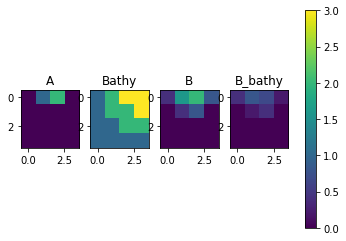

In [ ]:
Tup=(A,Bathy,B,B_bathy)
Tup_name = ("A", "Bathy", "B", "B_bathy")
fig, axes = plt.subplots(nrows=1, ncols=4)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=3)
    
fig.colorbar(im, ax=axes.ravel().tolist())

## Produit de convolution avec mask

idée 1 : en utilisant les valeurs complexes le code ici : https://stackoverflow.com/questions/38318362/2d-convolution-in-python-with-missing-data

idée 2 (bof): on découpe la carte non masqué en bloc rectangulaire et on fait les produits de convolution avec une zone d'overlap:
image.png

In [ ]:
A = np.array([[0,1,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
Mask = np.ones(A.shape)
Mask[1,:] = 0 
Mask = np.ma.masked_equal(Mask, 0)
Amask = np.multiply(A,Mask)
Amask

masked_array(
  data=[[0.0, 1.0, 2.0, 0.0],
        [--, --, --, --],
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0]],
  mask=[[False, False, False, False],
        [ True,  True,  True,  True],
        [False, False, False, False],
        [False, False, False, False]],
  fill_value=0.0)

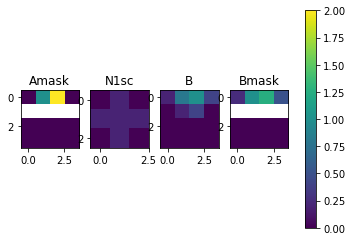

In [ ]:
B = signal.convolve2d(A, N1sc, mode='same', boundary='symm')
Bmask = ds.masked_convolve2d(Amask, N1sc, mode='same', boundary='symm')
Tup=(Amask,N1sc,B, Bmask)
Tup_name = ("Amask", "N1sc", "B", "Bmask")
fig, axes = plt.subplots(nrows=1, ncols=4)
for i in range(0,len(Tup)):
    axes.flat[i].set_title(Tup_name[i])
    im = axes.flat[i].imshow(Tup[i], vmin=0, vmax=2)
    
fig.colorbar(im, ax=axes.ravel().tolist())

In [ ]:
Amask_ = np.multiply(Amask.data, Amask.mask == 0)
Bmask_ = np.multiply(Bmask.data, Bmask.mask == 0)


print("A", np.sum(A),
       "Amask", np.sum(Amask_),
       "B", np.sum(B),
       "Bmask", np.sum(Bmask_))


A 3 Amask 3.0 B 3.0 Bmask 3.0
